<center> **HomeWork **
<br>Gagandeep Singh
</center>

In [1]:
# Lets import the required moduldes 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
data = pd.read_csv('data.csv',parse_dates=['transfer_created_by_customer_time','transfer_received_by_tw_time',\
                                           'transfer_converted_time','transfer_sent_out_by_tw_time',\
                                           'transfer_delivered_to_customer_time'])

# Q1:
As we will see, that the delivery time depends on the time from customer created the transfer and the payment method.

There are 2 ways we can define the delivery time:

Simply calculating the duration between the delivery time and the time at which the customer initiated the transfer: 
**delivery_time = transfer_delivered_to_customer_time - transfer_created_by_customer_time**

or

We can calculate the intermediatery transfer durations and sum them up as below:

**delivery_time = time_cust_init_to_rec + time_rec_to_covt + time_conv_to_send_out + time_send_out_to_delv**

**delivery_time = (transfer_received_by_tw_time - transfer_created_by_customer_time) + (transfer_converted_time - transfer_received_by_tw_time) + (transfer_sent_out_by_tw_time - transfer_converted_time) + (transfer_delivered_to_customer_time - transfer_sent_out_by_tw_time)**

Overall the duration will be the same, but the intermediatery method allows to check in case there are exceptional cases where some data is messed up. So, We will explore both methods and check of **delivery_time** is same or not.
 
`While calculating the duration for a particular transfer we will also factor in the payment method(if it will affect the duration)`

**For the datetime type we only get days and seconds separately, so to get total duration we need to add days and convert seconds to days to get overall duration in days.**

In [3]:
data['ov_conv_time'] =  (data['transfer_delivered_to_customer_time']-data['transfer_created_by_customer_time']).dt.days + \
(data['transfer_delivered_to_customer_time']-data['transfer_created_by_customer_time']).dt.seconds/86400

Text(0.5,1,'Delivery time for each transfer simple method')

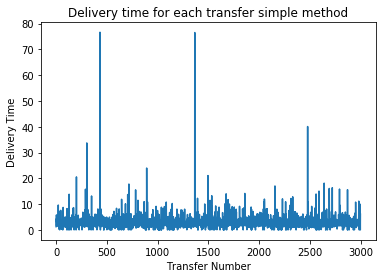

In [4]:
plt.plot(data['ov_conv_time'])
plt.xlabel('Transfer Number')
plt.ylabel('Delivery Time')
plt.title('Delivery time for each transfer simple method')

As we could see there were some exceptional instances where the delivery time was more than 70 days. Lets try to check with intermediatery method.

In [5]:
#delivery_time = (transfer_received_by_tw_time - transfer_created_by_customer_time) + 
#(transfer_converted_time - transfer_received_by_tw_time) + 
#(transfer_sent_out_by_tw_time - transfer_converted_time) + 
#(transfer_delivered_to_customer_time - transfer_sent_out_by_tw_time)

data['time_cust_init_to_rec'] =  (data['transfer_received_by_tw_time']-data['transfer_created_by_customer_time']).dt.days\
+ (data['transfer_received_by_tw_time']-data['transfer_created_by_customer_time']).dt.seconds/86400


data['time_rec_to_covt'] =  (data['transfer_converted_time']-data['transfer_received_by_tw_time']).dt.days +\
(data['transfer_converted_time']-data['transfer_received_by_tw_time']).dt.seconds/86400


data['time_conv_to_send_out'] =  (data['transfer_sent_out_by_tw_time']-data['transfer_converted_time']).dt.days +\
(data['transfer_sent_out_by_tw_time']-data['transfer_converted_time']).dt.seconds/86400

data['time_send_out_to_delv'] =  (data['transfer_delivered_to_customer_time']-data['transfer_sent_out_by_tw_time']).dt.days + \
(data['transfer_delivered_to_customer_time']-data['transfer_sent_out_by_tw_time']).dt.seconds/86400

data['ov_time_int_steps'] = data['time_cust_init_to_rec'] + data['time_rec_to_covt'] + data['time_conv_to_send_out'] + \
data['time_send_out_to_delv']

Text(0.5,1,'Delivery time for each transfer intermediatery steps method')

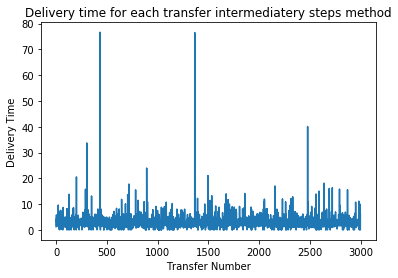

In [6]:
plt.plot(data['ov_time_int_steps'])
plt.xlabel('Transfer Number')
plt.ylabel('Delivery Time')
plt.title('Delivery time for each transfer intermediatery steps method')

In [7]:
data['ov_time_int_steps'].head()

0    1.263889
1    4.194444
2    3.227083
3    4.956250
4    5.818750
Name: ov_time_int_steps, dtype: float64

In [8]:
data['ov_conv_time'].head()


0    1.263889
1    4.194444
2    3.227083
3    4.956250
4    5.818750
Name: ov_conv_time, dtype: float64

As we can see from above the delivery time is the same using both the methods, but the intermediatery steps method allows us to look through the process more closely and optimize. Lets have a look how the intermediatery durations look like.

In [9]:
# lets see if the duration is negative in any cases, as we can see there are dates for which 
# transfer_sent_out_by_tw_time < transfer_converted_time, meaning there was mistake in these data points, but if we look at
# ov_conv_time, the duration is always positive, so ov_conv_time is not affected by mistakes in intermediatery steps 
print(sum(data['time_cust_init_to_rec'] < 0))
print(sum(data['time_rec_to_covt'] < 0))
print(sum(data['time_conv_to_send_out'] < 0))
print(sum(data['time_send_out_to_delv'] < 0))
print(sum(data['ov_time_int_steps']<0))
print(sum(data['ov_conv_time']<0))

0
0
3
0
0
0


Text(0,0.5,'time_cust_init_to_rec by TW')

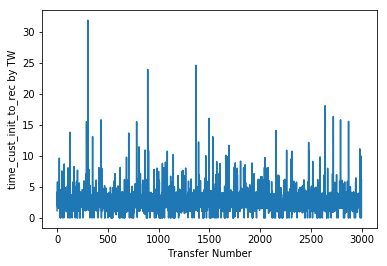

In [10]:
plt.plot(data['time_cust_init_to_rec'])
plt.xlabel('Transfer Number')
plt.ylabel('time_cust_init_to_rec by TW')

Text(0,0.5,'time_rec_to_covt by TW')

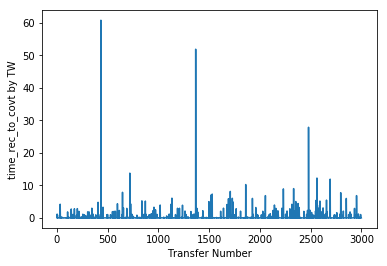

In [11]:
plt.plot(data['time_rec_to_covt'])
plt.xlabel('Transfer Number')
plt.ylabel('time_rec_to_covt by TW')

Text(0,0.5,'time_conv_to_send_out by TW')

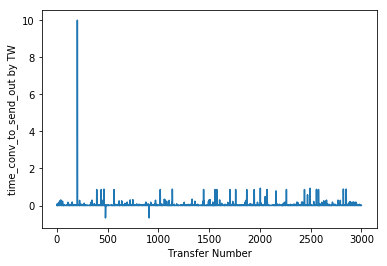

In [12]:
plt.plot(data['time_conv_to_send_out'])
plt.xlabel('Transfer Number')
plt.ylabel('time_conv_to_send_out by TW')

Text(0,0.5,'time_send_out_to_delv by TW')

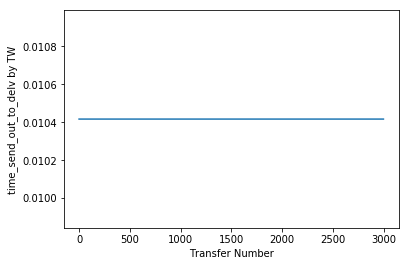

In [13]:
plt.plot(data['time_send_out_to_delv'])
plt.xlabel('Transfer Number')
plt.ylabel('time_send_out_to_delv by TW')

As we can see from above graphs majority of the time is taken by **time_cust_init_to_rec** and there are some -ve durations in **time_conv_to_send_out**. Also, **time_send_out_to_delv** is constant. We can remove these -ve durations from **time_conv_to_send_out**, but Since **ov_conv_time** is independent of intermediatery steps, So I will use **ov_conv_time** for this analysis and developing our delivery estimation algorithm.

Now since we wish to calculate the delivery time(duration), it will take for a customer from the time he/she initiated the transfer we use the following algorithm to calculate the delivery time(duration) it will take to do the transfer:

1. We will use the average time for a week or a month + standard deviation for that week/month to estimate the delivery time(duration).
2. We will also test if payment method affects delivery/transfer time or not.
2. We will test to check if week or a month have enough observations to be statistically relevant. In my experience we need at least 1500 observations during a period for them to statistically relevant. Since we have overall 3000 observations and it will not be possible for each week for each week in an year to have 1500 observations, we will use the monthly average to calculate the delivery time(duration) required for the transfer.

Let's remove the outliers from **ov_conv_time**:

In [14]:
data = data[np.abs(data['ov_conv_time'] - data['ov_conv_time'].mean()) <= 3 * data['ov_conv_time'].std()]
data.reset_index(drop=True,inplace=True)
# data['ov_conv_time'].groupby(data.transfer_created_by_customer_time.dt.month).mean()

In [15]:
# Let's see what is the max number of observations we have for each week
data.groupby(data.transfer_created_by_customer_time.dt.week).size().max()

102

In [16]:
# Let's see what is the max number of obsevations we have for each month
data.groupby(data.transfer_created_by_customer_time.dt.month).size().max()

331

As we can see there are more observations during a month than a week, so it makes sense to use month as a predictor.

In [17]:
data['month'] = data.transfer_created_by_customer_time.dt.month
month_mean_time = data.groupby([data.month,data.payment_method], as_index=False).mean()
month_mean_time

,month,payment_method,ov_conv_time,time_cust_init_to_rec,time_rec_to_covt,time_conv_to_send_out,time_send_out_to_delv,ov_time_int_steps
0,1,A,3.470853,3.084837,0.278758,0.096841,0.010417,3.470853
1,1,C,1.240942,1.021256,0.195652,0.013617,0.010417,1.240942
2,2,A,2.866925,2.640605,0.202899,0.013005,0.010417,2.866925
3,2,C,1.090809,1.060825,0.014542,0.005025,0.010417,1.090809
4,3,A,2.701167,2.622459,0.051129,0.017163,0.010417,2.701167
5,3,C,0.754583,0.715046,0.025000,0.004120,0.010417,0.754583
6,4,A,2.935822,2.758805,0.147834,0.018767,0.010417,2.935822
7,4,C,2.488889,2.410764,0.016667,0.051042,0.010417,2.488889
8,5,A,3.068001,2.916684,0.109780,0.031121,0.010417,3.068001
9,5,C,4.018849,3.961012,0.036111,0.011310,0.010417,4.018849


In [19]:
# There was a bug in groupby std here,https://github.com/pandas-dev/pandas/issues/16799, so could not use as_index=False
std_dev = data.groupby([data.month,data.payment_method], as_index=True).std(ddof=1)
std_dev.reset_index(drop = False, inplace = True)
std_dev.fillna(0,inplace=True)
std_dev
# std_dev[(std_dev.index.get_level_values('month') == 1) & (std_dev.index.get_level_values('payment_method') == 'A')]['ov_conv_time']

,month,payment_method,ov_conv_time,time_cust_init_to_rec,time_rec_to_covt,time_conv_to_send_out,time_send_out_to_delv,ov_time_int_steps
0,1,A,1.798022,1.587414,0.789697,0.223385,0.0,1.798022
1,1,C,2.847212,2.455665,0.908750,0.052796,0.0,2.847212
2,2,A,1.987680,1.745867,0.895891,0.043818,0.0,1.987680
3,2,C,1.547276,1.536355,0.024083,0.006136,0.0,1.547276
4,3,A,1.668877,1.657782,0.263087,0.024202,0.0,1.668877
5,3,C,1.566714,1.517369,0.068431,0.009170,0.0,1.566714
6,4,A,1.697651,1.557127,0.628958,0.017607,0.0,1.697651
7,4,C,0.665859,0.588765,0.015713,0.061381,0.0,0.665859
8,5,A,1.551939,1.508674,0.389998,0.091247,0.0,1.551939
9,5,C,1.487859,1.507159,0.044745,0.011087,0.0,1.487859


Now we can use these averages and the std dev's based on each month and payment type to estimate the delivery time required for transfer. For example for 18th july, we will get 7th month and also we will check the payment type the customer might use, which we will ask the customer in case he/she uses our MVP to estimate, **because as is clear from above df's for mean and std deviation different payment methods leads to diff times.**

**My algorithm will work as follows:**

`delivery_time` =  **`avg time for that month and payment type + 3 * std dev for that month and payment type`**

Next, we can see the delivery time calculation for 18th july and 23rd December for different payment types. I am using the fact that delivery time will be normally distributed and we can use the **three standard deviations rule** to estimate the upper limit that the delivery time will be below that upper limit 99% of the time. 

### Also, I would like to consistently gather similar dataset as is provided here, to continuosly update the mean and std dev to adapt the algorithm with time.

In [20]:
def mean_time(month,ptype):
    return month_mean_time[(month_mean_time.month == month) & (month_mean_time.payment_method == ptype )]['ov_conv_time']

def stddev(month,ptype):
    return  std_dev[(std_dev.month == month) & (std_dev.payment_method == ptype )]['ov_conv_time']

In [23]:

_18JulyTime = mean_time(7,'A')  + 3 * stddev(7,'A')
print(str(round(_18JulyTime.values[0])) +' days')

_18JulyTime = mean_time(7,'B')  + 3 * stddev(7,'B')
if len(_18JulyTime.values) != 0:
    print(str(round(_18JulyTime.values[0])) +' days')
else:
    print("We do not have this kind of payment type for July month yet")

_18JulyTime = mean_time(7,'C')  + 3 * stddev(7,'C')
print(str(round(_18JulyTime.values[0])) +' days')


_23rdDecTime = mean_time(12,'A')  + 3 * stddev(12,'A')
print(str(round(_23rdDecTime.values[0])) +' days')


_23rdDecTime = mean_time(12,'B')  + 3 * stddev(12,'B')
print(str(round(_23rdDecTime.values[0])) +' days')

_23rdDecTime = mean_time(12,'C')  + 3 * stddev(12,'C')
print(str(round(_23rdDecTime.values[0])) +' days')

8.0 days
We do not have this kind of payment type for July month yet
16.0 days
7.0 days
2.0 days
7.0 days


On a later thought I think the delivery time will also be dependent on whether the customer did the transfer on a weekend or not, So I tried to eplore the given dataset:

As we can see from the given dataset and below result, the average time is not that much different on transfers initiated on weekdays and weekends, so for this Analysis I will use my simple algorithm.

### However, in real life I will use a bigger dataset, with more evidence and features, to create a more realistic model and will apply and test different models before we put them ever in production.

In [22]:
mask = (data['transfer_created_by_customer_time'].dt.weekday_name =='Saturday') \
| (data['transfer_created_by_customer_time'].dt.weekday_name =='Sunday')

#Lets check for the mean transfer time if the customer initiated the transfer on a weekend
print(data.ov_conv_time[mask].mean())
#Lets compare it to the mean transfer time if the customer initiated the transfer on a weekday
print(data.ov_conv_time[~mask].mean())

2.649871873718735
2.7673187808896227


## Q2:

a.) In exceptional cases, for example where the intermediatery time(which are beyond our control) will go high than expected, we will miss the estimate. In my opinion being late than what we conveyed to the customer is bad, and if it happenns, most likely the customer will churn. On the other hand if we can deliver earlier than the estimated time, it helps proving that we strive hard to provide good service and will help us retain and satisfy our customer.

b.) If we are too conservative(assuming it means we show a too low an estimate than actual), then most likely we will miss our estimate most of the time and will likely lead to customer(s) dissatisfaction and in stead of being a business opportunity, we will end up loosing alot of business (customers will most likely churn).

On the other hand if we take too conservative to mean to be least risky or as in statistics- **less likely to be giving out the wrong information**, then it might mean that we might be showing too long delivery times and as it might happen, we might be showing longer times than our compititors, which might lead to lost customers and business opportunilty. 

### So We must try to gather enough data(evidence) to estimate the delivery time to report a resonable delivery time, which will help us acquire more customers and grow business.

## Q3:

There are 2 places on the website where I will show estimated delivery times.

1. In the help section, where customers can use our delivery time estimator tool to estimate even before they initiate a transfer. Much like **Moneygram's** Fees Estimator:

![title](MGFE.png)
as later I discovered, we already have this tool in place :)(only for logged in user) at:

https://transferwise.com/transferFlow#/enterpayment

Which is part of the transfer flow, and I think it has been appropriately placed.

2. In case we have managed to create an estimator, with really low variance and tested it over some time for performance, I will place it at 
![title](TW.png)

after Guaranted Rate, a new row for estimated time, which we can show even to a user which is not logged in, which will be another differentiator for us.

After testing if it works within accepted error limits, probably we should advertise on the main page, ofcourse after discussions with stakeholders.

**We should always mention it as a note that the delivery time is an estimated maximum time, usually it will take less time to deliver than that**

## Q4 

The MVP I will like to build is a tool that shows/lets customer know in advance the transfer/delivery time and also show the transfer time as part of **transferFlow**.
We need 4 components to be build if we need to create a MVP to validate the estimator:

1. UI code (where to place the delivery time estimator and how would it look).
2. Code for the estimator logic.
3. KPI's code for monitoring the performance of the estimator.I am assuming we already have the code for storing the data for updating the estimator and actual delivery time in place.
4. Testing logic to test if all the functionality after integrating is working fine.

So I will allocate the 4 developers with time estimates as follows:

1. A front end developer, who will discuss and decide where to place the estimator and how the UI should look like for the best user experience. This dev will also write code to call the estimator logic when the UI is actiated for estimating delivery time. Time required: around 10-12 hours (depends on how busy the dev is)
2. A backend developer, who will write the estimator logic, and provide api for front end dev to call the estimator logic. Time Estimate: 10-12 hours.
3. Another developer to write the KPI's code for monitoring the performance of the estimator. I will mention about them in next Q. Time Required: 8-10 hours.
4. Once these three components are developed we need to test them if they are working fine or not in integration. I am assuming the three devs in first three steps are testing their code. I will allocate another developer to test the functionality is working as intended or not. Time required: 6-8 hours.

Overall I will allocate around 24-30 hours to develop the functionality. I will use the next 18 hours to monitor the KPI's for the estimtor and look for further improvements we could develop after collecting more evidence(data).

### Q5 

I will use following KPI's to monitor my Estimator's(for one currency corridor) success:

1. **On-time Transfers**: percentage of on-time transfers. It will help us know how much we managed to deliver on our promised transfer time.It will look like as:
![title](OTD.png)
2. **Average transfer time**: Average time taken for transfers. Formula: `total time for all transfers/total number of transfers`. This will give us an overall picture.
2. **Average Early time**: The average of `time_diff = ( predicted transfer time - actual transfer time )`. This will help us monitor by how far is our estimator deviating from actual time in cases where we did not miss the estimate. It will help us guide if we need to find more ways to optimize or not. Formula: `time_diff/number of transfers within predicted time`
3. **Average Delay**: In case of delayed transfer, by how much we missed the estimate on average. Again this will help us improve the estimator. Formula: `abs( predicted transfer time - actual transfer time /number of transfers which went over predicted time)`
